# Group Assignment

1. We can define the second difference matrix as follows ($N=5$ for example):
   $$
    A = \begin{pmatrix}
    2 &-1  &  & &\\
     -1 & 2 &-1  & \\
     & -1 & 2 &-1  \\
     & & -1  &2 &-1 \\
     & & & -1 & 2
    \end{pmatrix}
    $$
    a) Let the true solution $x_a$ be generated by the normal distributed random numbers, thus $b = Ax$  
    b) The convergence condition can be set as $||x_{n+1} − x_n|| \leq \epsilon$ for some small value of $\epsilon$. Choose your own $\epsilon$, try to modify the sample script `jacobi_method.ipynb` to count how many loop iterations occur before convergence. How does it change with the change of $N$?  
    c) The weighted Jacobi method uses a parameter $\omega$ to compute the iteration as
   $$
    \mathbf {x} ^{(k+1)}=\left(1-\omega \right)\mathbf {x} ^{(k)}+ \omega\mathbf {x} ^{(k+1)}_{\text{Jacobi}}=\left(1-\omega \right)\mathbf {x} ^{(k)}+ \omega D^{-1}(\mathbf {b} -(L+U)\mathbf {x} ^{(k)})
   $$
    with $\omega =2/3$ being the usual choice. Modify your script to implement the weighted Jacobi method. Does it converge faster than the Jacobi method?
    Hint: You can read *Jacobi_method_Wikipedia.pdf* for your reference. 

In [4]:
import numpy as np
import random

def Generate_A_b(N):     # 定义一个产生我们要求的A,x_a,b的函数
    I = np.eye(N)
    L = np.zeros((N,N))
    for i in range(1,N):
        L[i,i-1] = 1
    U = L.T
    A = 2*I - L - U
    x_a = np.zeros((N,1))
    for i in range(N):
        x_a[i,0] = random.normalvariate(0,1)
    b = A@x_a
    return A,x_a,b

(A,x_a,b) = Generate_A_b(5)
print(f'A = \n{A}')
print(f'x_a =\n {x_a}')
print(f'b = \n{b}')


A = 
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]
x_a =
 [[-0.12649358]
 [-0.36391951]
 [ 0.69134178]
 [-0.77279592]
 [ 0.35723972]]
b = 
[[ 0.11093235]
 [-1.29268722]
 [ 2.51939899]
 [-2.59417334]
 [ 1.48727537]]


In [5]:
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot

def jacobi(A, b, eps = 1e-5, N = 1000 ,x=None):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed                                                     
    if x is None:
        x = np.ones((np.shape(A)[0],1))
    # Create a vector of the diagonal elements of A
    # and subtract them from A

    D = np.matrix(diag(A)).T
    R = A - diagflat(D)
    
    xlast = x
    for i in range(N):
        x = (b - dot(R,x)) / D
        if np.linalg.norm(x-xlast) < eps:
            break
        xlast = x
    
    return x, i+1 

NN = [5,7,10,15]        # test the iteration times when N = 5, 7, 10, 15
for N in NN:
    print(f'for N = {N}')
    (A,x_a,b) = Generate_A_b(N)
    if N == 5:
        store = (A,x_a,b)
    print(f'A = \n{A}')
    print(f'x_a =\n {x_a}')
    print(f'b = \n{b}')
    sol = jacobi(A,b)
    print("x:"); pprint(sol[0])
    print(f'iteration times: {sol[1]}')
    print(60*'-')

for N = 5
A = 
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]
x_a =
 [[ 1.19890435]
 [ 0.5806933 ]
 [-0.48211893]
 [-2.38904984]
 [ 0.38416309]]
b = 
[[ 1.8171154 ]
 [ 0.44460117]
 [ 0.84411868]
 [-4.68014383]
 [ 3.15737601]]
x:
matrix([[ 1.19890674],
        [ 0.58070138],
        [-0.48211415],
        [-2.38904176],
        [ 0.38416548]])
iteration times: 86
------------------------------------------------------------
for N = 7
A = 
[[ 2. -1.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0. -1.  2.]]
x_a =
 [[-2.86854762]
 [ 1.03536327]
 [ 0.86150152]
 [ 0.49835787]
 [-1.01222819]
 [-1.40633634]
 [-0.43973774]]
b = 
[[-6.77245851]
 [ 4.07777264]
 [ 0.18928189]
 [ 1.14744243]
 [-1.11647792]
 [-1.36070674]
 [ 0.52686085]]
x:
matrix([[-2.86854372],
        [ 1.03536717],

Obviously, iteration times grows with $N$

In [6]:
def jacobi_weight(A, b, weight, eps = 1e-5, N = 1000 ,x=None):
    # Create an initial guess if needed                                                     
    if x is None:
        x = np.ones((np.shape(A)[0],1))
    # Create a vector of the diagonal elements of A
    # and subtract them from A

    D = np.matrix(diag(A)).T
    R = A - diagflat(D)
    
    xlast = x
    for i in range(N):
        x = (1 - weight) * x + weight * (b - dot(R,x)) / D
        if np.linalg.norm(x-xlast) < eps:
            break
        xlast = x

    return x, i+1 

(A,b) = store[0],store[2]
sol = jacobi_weight(A,b,2.0/3)

print("x:"); pprint(sol[0])
print(f'iteration times: {sol[1]}')

x:
matrix([[ 1.19893255],
        [ 0.58074214],
        [-0.48206253],
        [-2.38900099],
        [ 0.38419129]])
iteration times: 110


To get the same precision $|x_{n+1} - x_{n}|\lt 1e-5$, jacobi method iteration times is **89**, the weighted Jacobi method interation times is **101**, so the weighted Jacobi method isn't faster

2. Apply the Gauss-Seidel method to solve the linear equations given in Problem 1.
   a)  Choose your own $\epsilon$, try to modify the sample script `gauss_seidel_method.ipynb` to count the executing time before convergence. How does it change with the change of $N$? 
   b) Does Gauss-Seidel method converge, as expected, faster than the Jacobi method?
   Hint: You can read *Gauss_Seidel_method_Wikipedia.pdf* for your reference. 

In [16]:
import numpy as np
# gauss seidel method:
def gauss_seidel(A, b, eps=1e-5, N=1000, x=None):
    dim = np.shape(A)[0]
    if x == None:               # if no epsific start point, set to all zero
        x = np.ones(dim)
    x_last = np.ones(dim)
    for i in range(dim):
        sum_xi = 0
        for j in range(dim):
            if j == i:
                continue
            sum_xi -= A[i, j] * x[j]
        x[i] = (b[i] + sum_xi) / A[i, i]
    
    x_last[:] = x[:]
    for n in range(N):
        for i in range(dim):
            sum_xi = 0
            for j in range(dim):
                if j == i:
                    continue
                sum_xi -= A[i, j] * x[j]
            x[i] = (b[i] + sum_xi) / A[i, i]
        if np.linalg.norm(x - x_last) < eps:
            break
        x_last[:] = x[:]  


    return x, n + 1


In [17]:
# test the iteration times when N = 5, 7, 10, 15 for gauss seidle method
NN = [5,7,10,15]       
for N in NN:
    print(f'for N = {N}')
    (A,x_a,b) = Generate_A_b(N)
    print(f'A = \n{A}')
    print(f'x_a =\n {x_a}')
    print(f'b = \n{b}')
    sol_g = gauss_seidel(A,b)
    sol_j = jacobi(A,b)
    print("gauss seidel: ")
    print("x:"); pprint(sol_g[0])
    print(f'iteration times: {sol_g[1]}')
    print("jacobi: ")
    print("x:"); pprint(sol_j[0])
    print(f'iteration times: {sol_j[1]}')
    print(60*'-')



for N = 5
A = 
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]
x_a =
 [[ 0.12520141]
 [ 1.2477339 ]
 [-0.28440147]
 [-0.43263429]
 [-0.84875971]]
b = 
[[-0.99733109]
 [ 2.65466787]
 [-1.38390256]
 [ 0.2678926 ]
 [-1.26488513]]
gauss seidel: 
x:
array([ 0.12521069,  1.24774782, -0.28438756, -0.43262385, -0.84875449])
iteration times: 40
jacobi: 
x:
matrix([[ 0.12520515],
        [ 1.24773642],
        [-0.28439399],
        [-0.43263178],
        [-0.84875597]])
iteration times: 86
------------------------------------------------------------
for N = 7
A = 
[[ 2. -1.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0. -1.  2.]]
x_a =
 [[-1.14245361]
 [ 0.51449179]
 [ 0.43349826]
 [ 1.48203493]
 [-1.8228445 ]
 [ 0.65131731]
 [ 0.2727374 ]]
b = 
[[-2.79939902]
 [ 1.73793894]
 [-1

3. The method of successive over-relaxation (SOR) is a variant of the Gauss–Seidel method for solving a linear system of equations, resulting in faster convergence, where the iterative is defined as
   $$
   \begin{aligned}
   \mathbf{x}^{(k+1)}&= (1-\omega)\mathbf{x}^{(k)}+\omega \mathbf{x}^{(k+1)}_{\text{Gauss-Seidel}}\\
   x_i^{(k+1)}&=(1-\omega)x_i^{(k)}+\frac{\omega}{a_{ii}}\left(b_i-\displaystyle\sum_{j<i}a_{ij}x_j^{(k+1)}-\displaystyle\sum_{j>i}a_{ij}x_j^{(k)}\right)
   \end{aligned}
   $$
   where $0<\omega <2$. $\omega >1$ is called the relaxation factor. 
   Consider the linear system as follows:
   $$
   \begin{cases}
   3x_1 - x_2+ x_3 = -1\\
   -x_1 +3x_2 -x_3 = 7\\
   x_1 - x_2 +3x_3 = -7\\
      \end{cases}
   $$
   a) Set your own $\epsilon$, try to modify the sample script `gauss_seidel_method.ipynb` to implement the SOR method.
   b) Can you find the optimal value of $\omega$ empirically? Please compare your result with the theoretical prediction - the optimal relaxation parameter $\omega$ is given by
    $$
    \omega_\text{opt} = 1+\left(\frac{\lambda_J}{1+\sqrt{1-\lambda_J^2}}\right)^2 
    $$
    $\lambda_J$ is the spectral radius calculated  in the Jacobi method.   
    Hint: You can read *SOR_method_Wikipedia.pdf* for your reference. 
   

In [1]:
from pprint import pprint
from numpy import array, zeros, zeros_like, dot, allclose

# I only changed the name of function and the algorithm of x_new.
def SOR(A, b, N=25, x=None, omega=1.5):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed                                                                                                                                                            
    if x is None:
        x = zeros_like(b)

    # Iterate for N times  
    for it_count in range(N):
        x_new = zeros_like(x)
        print("Iteration {0}: {1}".format(it_count, x))
        for i in range(A.shape[0]):
            s1 = dot(A[i, :i], x_new[:i])
            s2 = dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (1-omega) * x[i] + omega * (b[i] - s1 - s2) / A[i, i]
        if allclose(x, x_new, rtol=1e-8):
            break
        x = x_new
    return x

def test_SOR():
    A = array([[3.0,-1.0,1.0],[-1.0,3.0,-1.0],[1.0,-1.0,3.0]])
    b = array([-1.0,7.0,-7.0])
    guess = array([1.0,1.0,1.0])

    sol = SOR(A,b,N=25,x=guess)

    print('A:'); pprint(A)
    
    print("b:"); pprint(b)

    print("x:"); pprint(sol)

if __name__ == '__main__':
    test_SOR()

Iteration 0: [1. 1. 1.]
Iteration 1: [-1.  3. -2.]
Iteration 2: [ 2.5    2.25  -2.625]
Iteration 3: [ 0.6875    1.40625  -1.828125]
Iteration 4: [ 0.7734375   2.26953125 -1.83789062]
Iteration 5: [ 1.16699219  2.02978516 -2.1496582 ]
Iteration 6: [ 1.00622559  1.91339111 -1.97158813]
Iteration 7: [ 0.93937683  2.02719879 -1.97029495]
Iteration 8: [ 1.02905846  2.01578236 -2.02149057]
Iteration 9: [ 1.00410724  1.98341715 -1.99959975]
Iteration 10: [ 0.98945484  2.00321896 -1.99331806]
Iteration 11: [ 1.00354109  2.00350204 -2.0033605 ]
Iteration 12: [ 1.00166072  1.99739909 -2.00045056]
Iteration 13: [ 0.99809447  2.00012241 -1.99876075]
Iteration 14: [ 1.00039434  2.00075559 -2.000439  ]
Iteration 15: [ 1.00040013  1.99960277 -2.00017918]
Iteration 16: [ 0.99969091  1.99995448 -1.99977862]
Iteration 17: [ 1.0000211   2.000144   -2.00004924]
Iteration 18: [ 1.00008607  1.99994642 -2.00004521]
Iteration 19: [ 0.99995278  1.99998058 -1.9999635 ]
Iteration 20: [ 0.99999565  2.00002579 -2.

Theoretical omega equals 0.8541019662496845, while empirical omega equals 0.9894472361809044

The empirical omega has the min iteration to achieve the given precision. Obviously, the theoretical omega needs two more iteration two achieve the same precision.


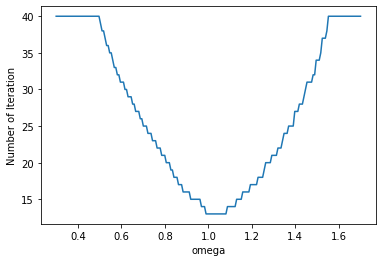

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# (b), first plot iteration times as a function of omega.
A = array([[3.0,-1.0,1.0],[-1.0,3.0,-1.0],[1.0,-1.0,3.0]])
b = array([-1.0,7.0,-7.0])
root = array([1.0,2.0,-2.0])

def SOR1(A, b, N=25, x=None, omega=1.5):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed             
    # This times only output interation num.
    if x is None:
        x = zeros_like(b)

    # Iterate for N times  
    runs = 0  # calculate iteration num
    for it_count in range(N):
        x_new = zeros_like(x)
        for i in range(A.shape[0]):
            s1 = dot(A[i, :i], x_new[:i])
            s2 = dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (1-omega) * x[i] + omega * (b[i] - s1 - s2) / A[i, i]
        runs = runs + 1
        if allclose(x, x_new, rtol=1e-8):
            break
        x = x_new
    return runs

def test_SOR(A,b,root,omegas):
    guess = array([1.0,1.0,1.0])
    runs = []  # Initialize error for different omega.
    
    for omega1 in omegas:
        itnum = SOR1(A,b,N=40,x=guess,omega=omega1)
        # error.append(np.linalg.norm(sol - root)/np.linalg.norm(root))
        runs.append(itnum)
    
    plt.plot(omegas,runs)
    plt.xlabel("omega")
    plt.ylabel("Number of Iteration")
    return runs

omegas=np.linspace(0.3,1.7,200)
runs = test_SOR(A,b,root,omegas)
# Find the best omega
bestOmega = omegas[np.argmin(runs)]

# Then try to find the theoretical omega.
# First find D (diagonal),L (left),R (right) of A.
D,L,R = zeros_like(A),zeros_like(A),zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i > j:
            L[i,j] = A[i,j]
        elif i < j:
            R[i,j] = A[i,j]
        else:
            D[i,j] = A[i,j]
# Calculate lambda J
J = -1 * np.dot(np.linalg.inv(D),(L + R))
lamb = np.linalg.eig(J)
lamb = np.max(abs(lamb[0]))  # lamb is the max eigenvalue of J.
theoretical_omega = 1 - (lamb/(1+np.sqrt(1-lamb**2)))**2
print("Theoretical omega equals {1}, while empirical omega equals {0}\n".format(bestOmega,theoretical_omega))
print("The empirical omega has the min iteration to achieve the given precision. Obviously, the \
theoretical omega needs two more iteration two achieve the same precision.")

4. One application of the conjugate gradient method is to solve the normal equation to find the least-square solution of an (over-determined) equation system $\mathbf{A}\mathbf{x}=\mathbf{b}$, where the coefficient matrix $\mathbf{A}$ is $M$ by $N$ of rank $n$, i.e., $M\geq N=n$.The normal equation of this system is 
$$
\mathbf{A}^{T}\mathbf{A}\mathbf{x}=\mathbf{A}^{T}\mathbf{b}% 
$$
Here $\mathbf{A}^{T}\mathbf{A}$ is an $N$ by $N$ symmetric, positive definite matrix. When $A$ is a large-sized sparse symmetrical matrix, conjugate gradient method is also preferred. 
Modify the sample script  `conj_grad.ipynb` to solve Problem 1. Please compare your results with the results from the Jacobi method and the Cholesky method. 

In [4]:
import numpy as np
from numpy import array, zeros, diag, diagflat, dot
import random
import time

def conjugate_grad(A, b, N=1000, x=None):
    # If no input x, then initialize with one. N is the iteration times.
    n = len(b)
    if not x:
        x = np.ones(n)
    # Initialize the first run.
    r = b - np.dot(A, x)
    p = r
    r_k_norm = np.dot(r, r)

    if N < 2*n:
        N = 2 * n
    for i in range(N):
        Ap = np.dot(A, p)
        alpha = r_k_norm / np.dot(p, Ap)
        x += alpha * p
        r -= alpha * Ap
        r_kplus1_norm = np.dot(r, r)  # The norm of r[i+1]
        beta = r_kplus1_norm / r_k_norm
        r_k_norm = r_kplus1_norm  # The norm of r[i] (for the next run)
        if r_kplus1_norm < 1e-8:
            print('Itr:{}'.format(i))
            break
        p = r + beta * p
    return x

# Then solve Q1 again.
def Generate_A_b(N):     # 定义一个产生我们要求的A,x_a,b的函数
    I = np.eye(N)
    L = np.zeros((N,N))
    for i in range(1,N):
        L[i,i-1] = 1
    U = L.T
    A = 2*I - L - U
    x_a = np.zeros(N)
    for i in range(N):
        x_a[i] = random.normalvariate(0,1)
    b = np.dot(A,x_a)
    return A,x_a,b


def jacobi(A, b, N=1000, x=None):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed                                                                                                                                                            
    if x is None:
        x = zeros(len(A[0]))

    # Create a vector of the diagonal elements of A                                                       
    # and subtract them from A                                                                                     
    D = diag(A)
    R = A - diagflat(D)
    # Iterate for N times                                                                                         
    for i in range(N):
        x_new = (b - dot(R,x)) / D
        if allclose(x, x_new, rtol=1e-8):
            break
        
        x = x_new
    return x


def choleschy(A,b):
    # Use cholechy method solve linear function.
    # First calculate L
    L = np.zeros((A.shape[0],A.shape[1]))
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            sum_l = 0
            if i == j:
                for k in range(i):
                    sum_l += L[i,k]**2
                L[i,j] = np.sqrt(A[i,j]-sum_l)
            elif i > j:
                for m in range(j):
                    sum_l += L[i,m]*L[j,m]
                L[i,j] = (A[i,j]-sum_l) / L[j,j]
    # Then solve by backward substution.
    y = np.linalg.solve(L,b)
    x = np.linalg.solve(np.transpose(L),y)
    return x



if __name__ == '__main__':
    # Solve Q1 of 500*500 with three methods, since the result is 500*1, so i won't print it out.
    (A,x_a,b) = Generate_A_b(500)

    t1 = time.time()
    print('start')
    x = conjugate_grad(A, b)
    t2 = time.time()
    print("The time used by conjugate_grad is {}\n".format(t2 - t1))
    # print("The result is {}\n".format(x))
    x2 = jacobi(A, b)
    t3 = time.time()
    print("The time used by jacobi method is {}\n".format(t3 - t2))
    # print("The result is {}\n".format(x2))
    x3 = choleschy(A, b)
    t4 = time.time()
    print("The time used by cholechy is {}\n".format(t4 - t3))
    # print("The result is {}\n".format(x3))

    print("As we can see, conjugate method perform the best at large Matrix A than Jacobi, while cholechy is the slowest.")

start
Itr:492
The time used by conjugate_grad is 0.032914161682128906

The time used by jacobi method is 0.32114267349243164

The time used by cholechy is 9.965253829956055

As we can see, conjugate method perform the best at large Matrix A than Jacobi, while cholechy is the slowest.


5. Read Example 7.2[^1] and the sample script `power_method_eig.ipynb`. The problem is to find the largest eigenvalue of matrix $A$:
   $$
   A = \begin{pmatrix}
   4 & -i & 2 \\
   i & 2 & 2+7i \\
   2 & 2-7i & -2
   \end{pmatrix}
   $$
  a) Try modifying the above example to count how many loop iterations occur before convergence. Is it larger or smaller than you had expected?  
  b) An alternative to using the Rayleigh quotient to determine whether convergence is achieved is the convergence criterion 
   $$
   ||x_{n+1} − x_n|| \leq \epsilon
   $$
    This is especially useful if we do not need to compute the eigenvalue, and can save some computational time. Modify the code above to use this convergence criterion, and compare the overall wall time to the original version.

In [26]:

# function to calculate the Rayleigh quotient
def rayleigh_quotient(A,x):
    return np.dot(x, np.dot(A, x))/np.dot(x,x)

# function to normalise a vector
def normalise(x,eps=1e-10):
    N = np.sqrt(np.sum(abs(x)**2))
    if N < eps: # in case it is the zero vector!
        return x
    else:
        return x/N

A = np.array([[4, -1j, 2],
        [1j, 2, 2+7j],
        [2, 2-7j, -2]])

def find_eig(A, eps=1e-5, x=None):
    # choose the starting vector
    if x == None:       # if not specify a initial point
        x = normalise(np.array([1, 1, 1]))
    RQnew = rayleigh_quotient(A,x)
    RQold = 0

    # perform the power iteration
    cnt = 0
    while np.abs(RQnew-RQold) > eps:
        RQold = RQnew
        x = normalise(np.dot(A, x))
        RQnew = rayleigh_quotient(A, x)
        cnt += 1
    return RQnew, x, cnt

RQnew, x, cnt = find_eig(A)
print("Dominant eigenvector:",x)
print("Dominant eigenvalue: {:.5f}".format(RQnew))
print("iteration times: ", cnt)

Dominant eigenvector: [0.33980972-0.23445694j 0.49134274+0.51067232j 0.50105933-0.27621538j]
Dominant eigenvalue: 8.45188-0.00000j
iteration times:  157


In [28]:
def find_eig2(A, eps=1e-5, N=1000, x=None):
    # choose the starting vector
    if x == None:
        x = normalise(np.array([1, 1, 1]))
        x_last = np.copy(x)
    # perform the power iteration
    for cnt in range(N):
        x = normalise(np.dot(A, x))
        if np.linalg.norm(x - x_last) < eps:
            break
        x_last = np.copy(x)
    return RQnew, x, cnt

RQnew, x, cnt = find_eig2(A)
print("Dominant eigenvector:",x)
print("Dominant eigenvalue: {:.5f}".format(RQnew))
print("iteration times: ", cnt)

Dominant eigenvector: [0.33980994-0.2344566j  0.49134139+0.51067459j 0.50105691-0.27621799j]
Dominant eigenvalue: 8.45188-0.00000j
iteration times:  116


The overall time of new method is faster than the original one.

6. We can use the normalised power method above on $A^{−1}$ to calculate $\lambda_N$ — the smallest magnitude eigenvalue of $A$, and the dominant eigenvalue of $A^{−1}$. In practice, however, matrix inversion is a difficult numerical computation, is prone to error, and can be quite unstable. A more common approach than direct matrix inversion is to view the inverse power iteration as a system of linear equations to be solved involving $A$:  
Step 1. Choose a normalised starting vector $x_0$ where $||x_0|| = 1$;   
Step 2. Solve the system of linear equations $Ax_{n+1} = x_n$ to determine the next vector in the iteration, and normalise this vector;  
Step 3. Repeat step 2 until convergence is achieved, $||x_{n+1} − x_n|| \leq \epsilon$ for some small value of $\epsilon$. The Rayleigh quotient $x_n^\dagger Ax_n$ will provide the value of the smallest magnitude eigenvector of $A$.    
Modify the sample script to find the smallest eigenvalue of matrix $A$.

[^1]: Joshua Izaac, Jingbo Wang, Computational Quantum Mechanics, Springer, 2018

In [9]:
import numpy as np

def conjugate_residual(A, b, x=None):  
    """
    conjugate residual method to solve Hermitian matrix
    \(this method come from Wikipedia, url: https://en.wikipedia.org/wiki/Conjugate_residual_method\)
    """
    # if use Gauss method, it's equal to calculate the inverse of A
    n = len(b)
    if not x:
        x = np.ones(n)

    x = x
    r = b - np.dot(A,x)
    p = r
    
    for i in range( 2 * n ):
        rAr = np.dot(np.conj(r),np.dot(A,r))
        Ap = np.dot(A,p)
        alpha = rAr / np.dot( np.conj(Ap) , Ap )
        
        x = x + alpha * p
        r = r - alpha * Ap

        rAr_plus_one = np.dot( np.conj(r) ,np.dot(A,r))
        beta = rAr_plus_one / rAr

        
        if abs(np.linalg.norm(r)) < 1e-5:
            break

        p = r + beta * p

    return x

# function to calculate the Rayleigh quotient
def rayleigh_quotient(A,x):
    return np.dot(x, np.dot(A, x))/np.dot(x,x)

# function to normalise a vector
def normalise(x,eps=1e-10):
    N = np.sqrt(np.sum(abs(x)**2))
    if N < eps: # in case it is the zero vector!
        return x
    else:
        return x/N

A = np.array([[4, -1j, 2],
        [1j, 2, 2+7j],
        [2, 2-7j, -2]])

# choose the starting vector
x = normalise(np.array([1, 1, 1]))
RQnew = rayleigh_quotient(A,x)
RQold = 0

# perform the power iteration
while np.abs(RQnew-RQold) > 1e-6:
    RQold = RQnew
    x = normalise(conjugate_residual(A, x))
    RQnew = rayleigh_quotient(A, x)

print("Smallest eigenvalue: {:.5f}".format(RQnew))
print("Eigenvector correspond:\n",x)

Smallest eigenvalue: 3.18960-0.00000j
Eigenvector correspond:
 [ 0.76568347+0.48507841j  0.1333804 -0.35521551j -0.13264612-0.1298629j ]
